# activity 2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv('retail_sales_dataset.csv')

In [22]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b-%Y')
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Nov-2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Feb-2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Jan-2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May-2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May-2023


In [ ]:
monthly_sales = df.groupby("Month")["Total Amount"].sum().sort_index()

In [25]:
len(monthly_sales)

13

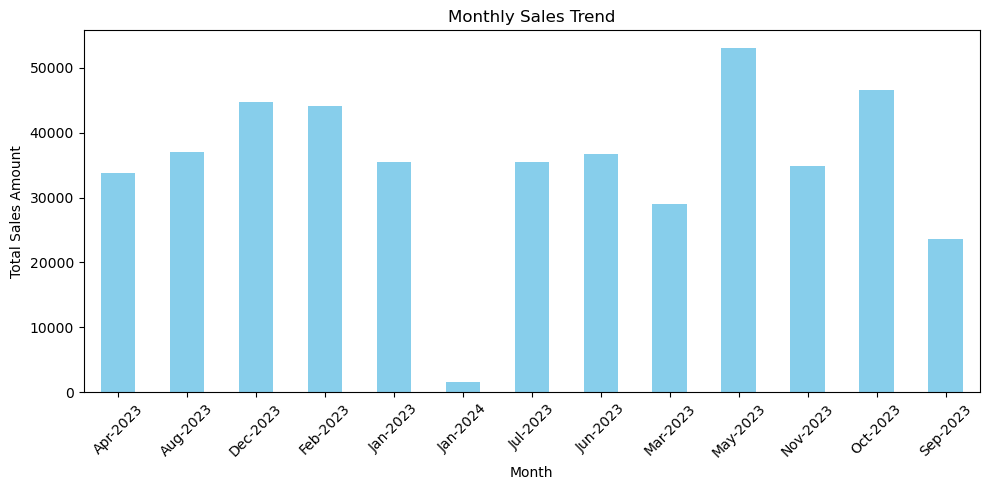

In [26]:

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


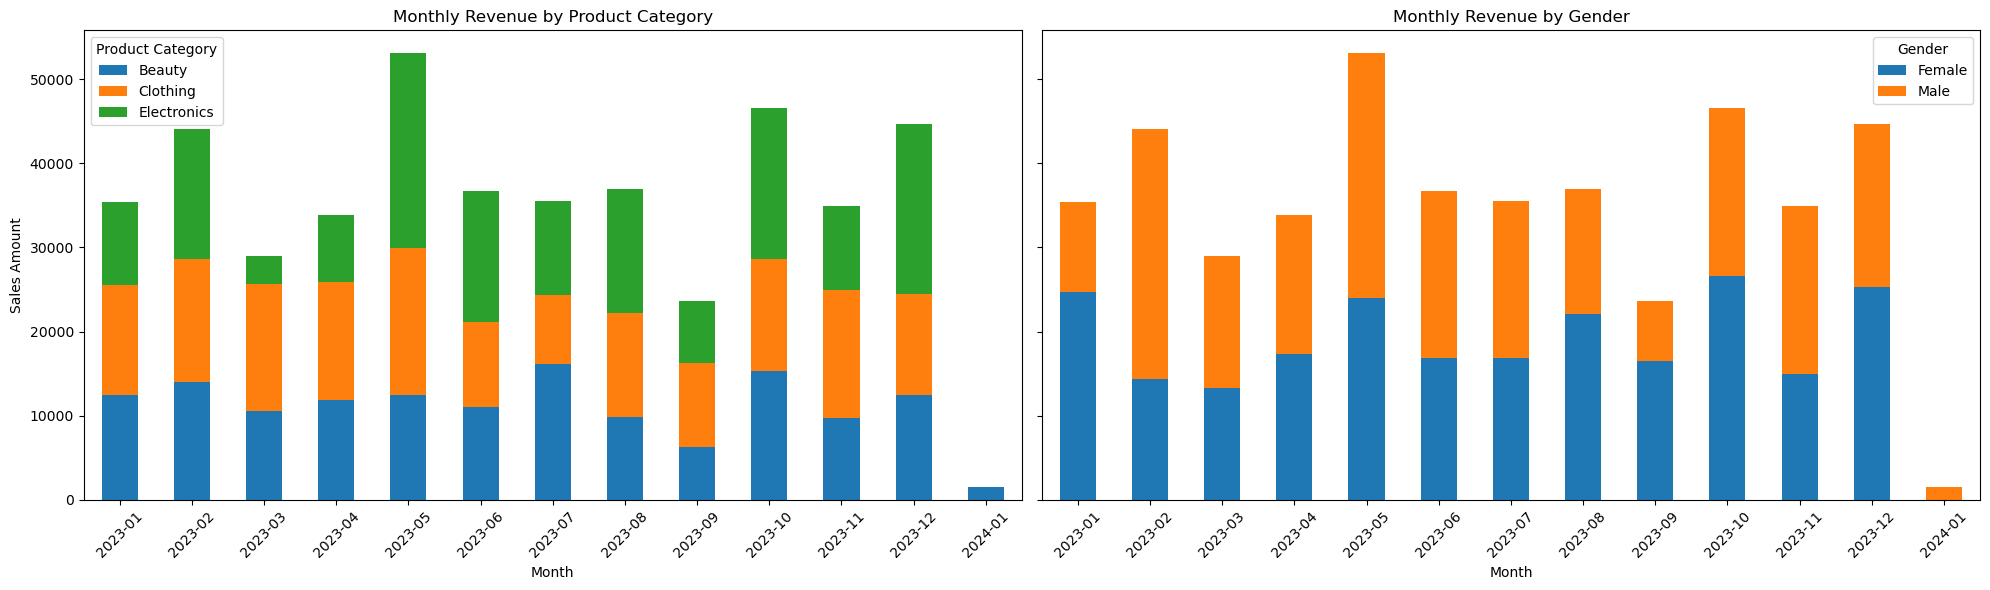

In [ ]:
# Load and preprocess the dataset
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period("M")

# Pivot: Monthly Revenue by Product Category
monthly_by_category = df.pivot_table(
    index='Month',
    columns='Product Category',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Pivot: Monthly Revenue by Gender
monthly_by_gender = df.pivot_table(
    index='Month',
    columns='Gender',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot 1: Revenue by Product Category
monthly_by_category.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Monthly Revenue by Product Category")
axes[0].set_ylabel("Sales Amount")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Revenue by Gender
monthly_by_gender.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Monthly Revenue by Gender")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


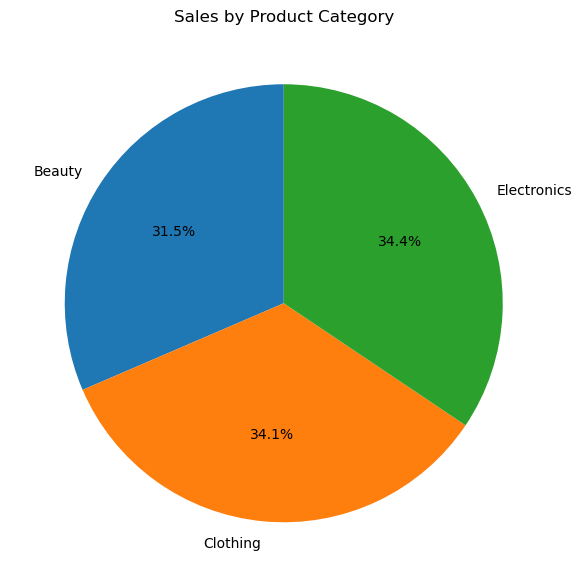

In [ ]:
category_sales = df.groupby("Product Category")["Total Amount"].sum()

plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales by Product Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

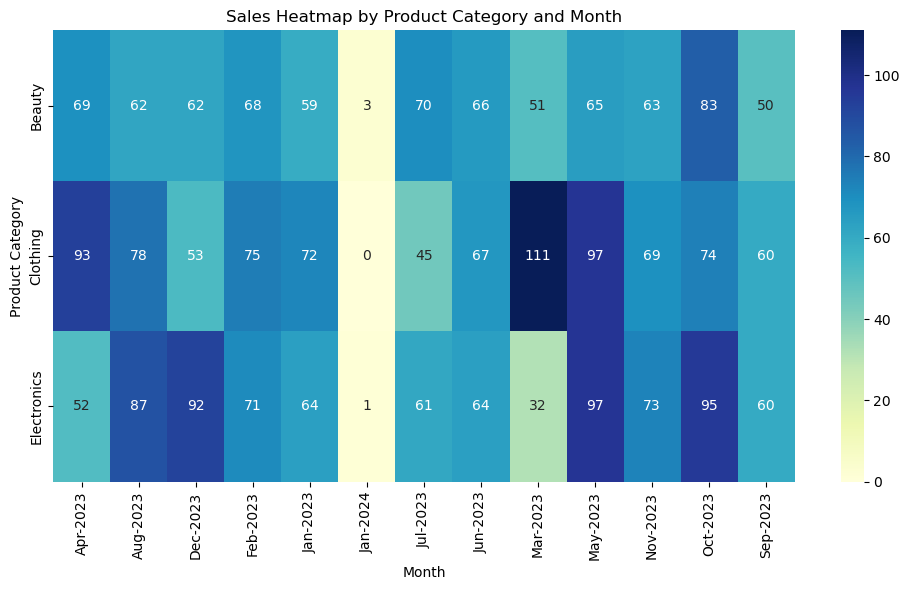

In [29]:
pivot_table = df.pivot_table(
    values="Quantity",
    index="Product Category",
    columns="Month",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Product Category and Month")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


C:\Users\serag\AppData\Local\Temp\ipykernel_33448\1386935864.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum()


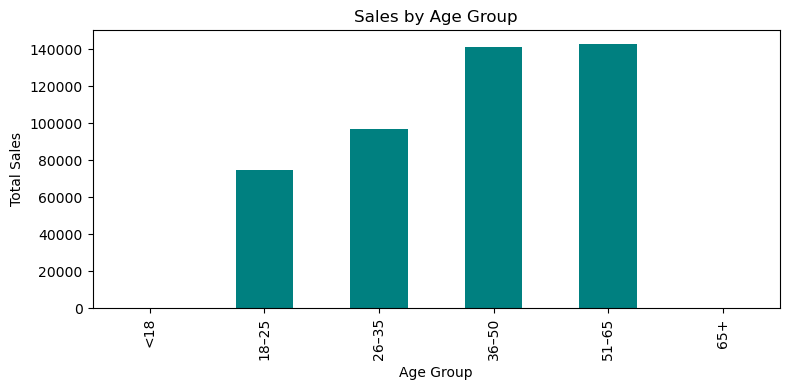

In [30]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18–25', '26–35', '36–50', '51–65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
age_group_sales.plot(kind='bar', color='teal', figsize=(8, 4))
plt.title("Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

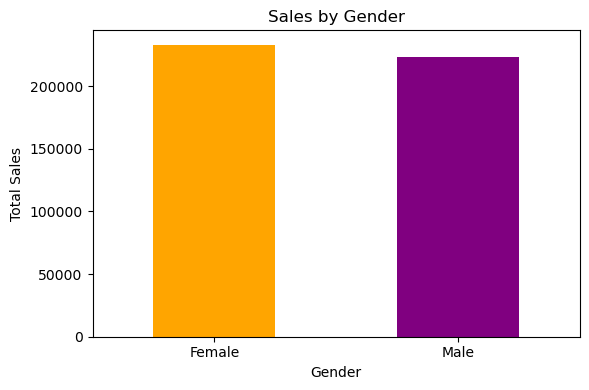

In [31]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

gender_sales.plot(kind='bar', color=['orange', 'purple'], figsize=(6, 4))
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


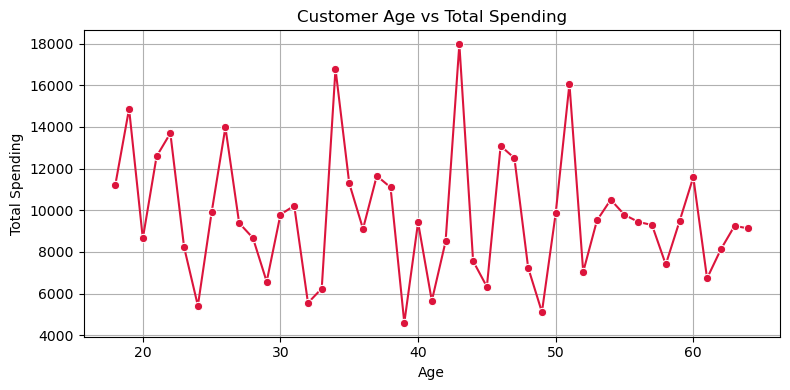

In [32]:
age_sales = df.groupby('Age')['Total Amount'].sum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=age_sales.index, y=age_sales.values, marker='o', color='crimson')
plt.title("Customer Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.grid(True)
plt.tight_layout()
plt.show()


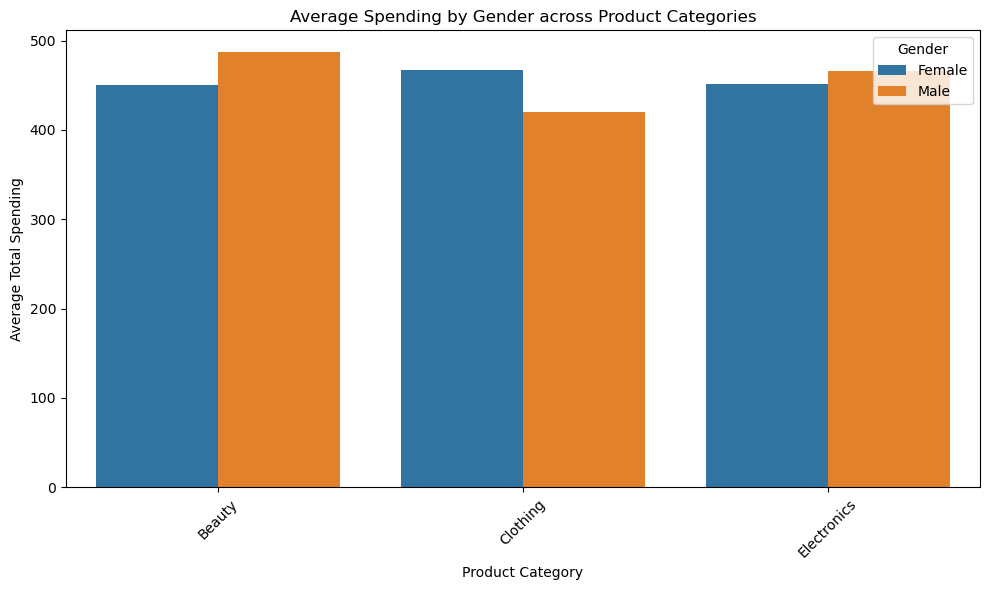

In [33]:
grouped = df.groupby(['Product Category', 'Gender'])['Total Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Product Category', y='Total Amount', hue='Gender')
plt.title("Average Spending by Gender across Product Categories")
plt.ylabel("Average Total Spending")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\serag\AppData\Local\Temp\ipykernel_33448\91208826.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age Group', 'Gender', 'Product Category'])['Total Amount'].mean().reset_index()


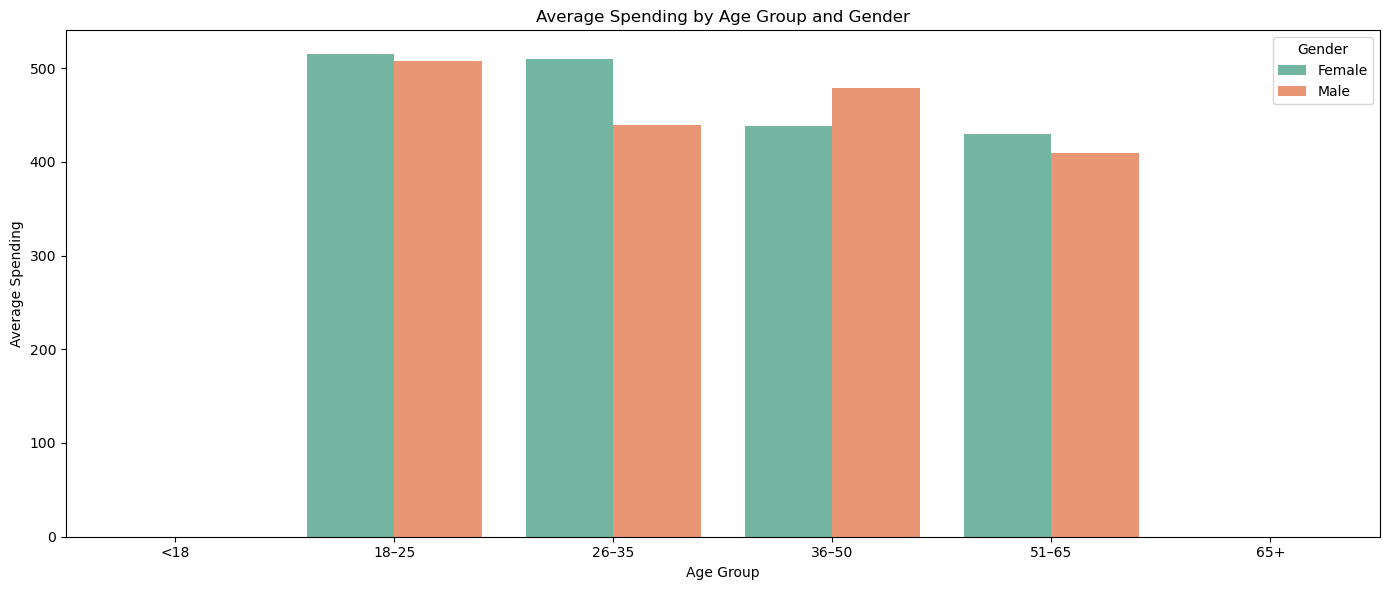

In [34]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18–25', '26–35', '36–50', '51–65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped = df.groupby(['Age Group', 'Gender', 'Product Category'])['Total Amount'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='Age Group',
    y='Total Amount',
    hue='Gender',
    errorbar=None,
    palette='Set2'
)
plt.title("Average Spending by Age Group and Gender")
plt.ylabel("Average Spending")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


# activity 3

R^2 Score: -11.837844765850965
MSE: 7728.382549042281


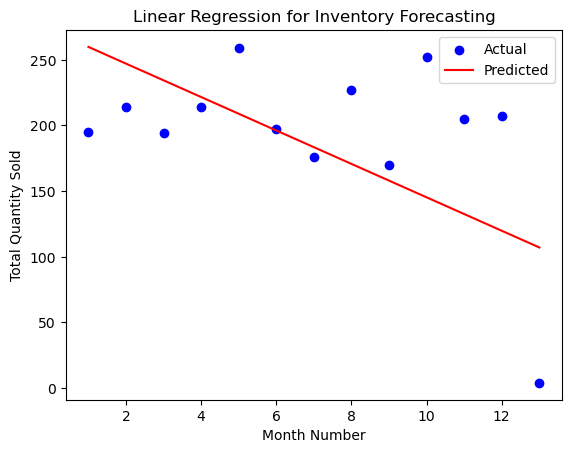

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_data = df.groupby('Month').agg({'Quantity': 'sum'}).reset_index()
monthly_data['Month_Num'] = range(1, len(monthly_data)+1)

X = monthly_data[['Month_Num']]
y = monthly_data['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', label='Predicted')
plt.xlabel('Month Number')
plt.ylabel('Total Quantity Sold')
plt.title('Linear Regression for Inventory Forecasting')
plt.legend()
plt.show()

In [36]:
X = df[['Quantity', 'Price per Unit', 'Product Category']]
y = df['Total Amount']

X = pd.get_dummies(X, columns=['Product Category'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred, 2)})
print(comparison.head())


R^2 Score: 0.8569968726653271
MSE: 41861.18927463783
     Actual  Predicted
521    1500    1345.51
737     100      40.20
740     300     482.85
660     100     337.59
411    2000    1529.20


R^2 Score: 0.8569189755192664
MSE: 41883.99204291275
     Actual  Predicted
521    1500    1346.23
737     100      47.37
740     300     482.91
660     100     330.17
411    2000    1542.65


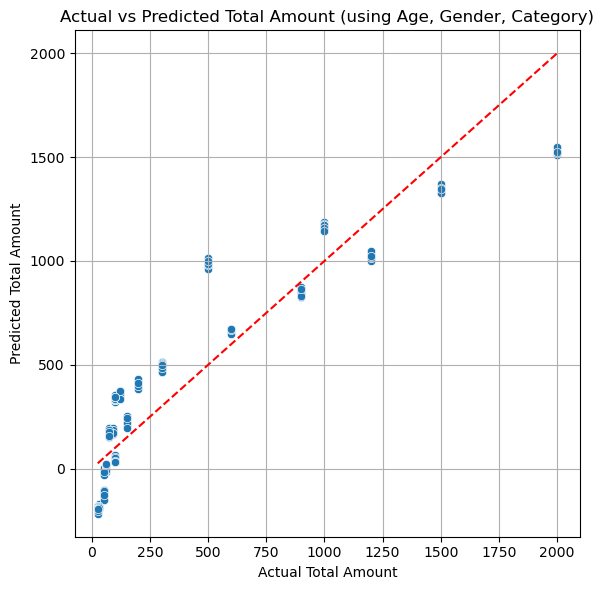

In [37]:
df_model = df[['Total Amount', 'Age', 'Gender', 'Product Category', 'Quantity', 'Price per Unit']].copy()
df_model = pd.get_dummies(df_model, columns=['Gender', 'Product Category'], drop_first=True)

X = df_model.drop('Total Amount', axis=1)
y = df_model['Total Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"MSE: {mse}")
print(pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred, 2)}).head())

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Total Amount")
plt.ylabel("Predicted Total Amount")
plt.title("Actual vs Predicted Total Amount (using Age, Gender, Category)")
plt.grid(True)
plt.tight_layout()
plt.show()
